### Monthly totals of international airline passengers, 1949 to 1960. Represented in 1000s. 

# Question: Split the data into train and test. Build different time series models on train data set and test it on test data set

# Question: Compare models performance

In [1]:
import pandas as pd 
import numpy as np 
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Importing data
df = pd.read_csv('airline-passengers.csv')

In [4]:
df.head()

,Month,Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [5]:
df.Timestamp = pd.to_datetime(df.Month,format='%Y-%m') 
df.index = df.Timestamp 

In [6]:
df.head()

,Month,Passengers
Month,,
1949-01-01,1949-01,112
1949-02-01,1949-02,118
1949-03-01,1949-03,132
1949-04-01,1949-04,129
1949-05-01,1949-05,121


In [7]:
#Creating train and test set 
train=df[0:int(len(df)*0.7)] 
test=df[int(len(df)*0.7):]

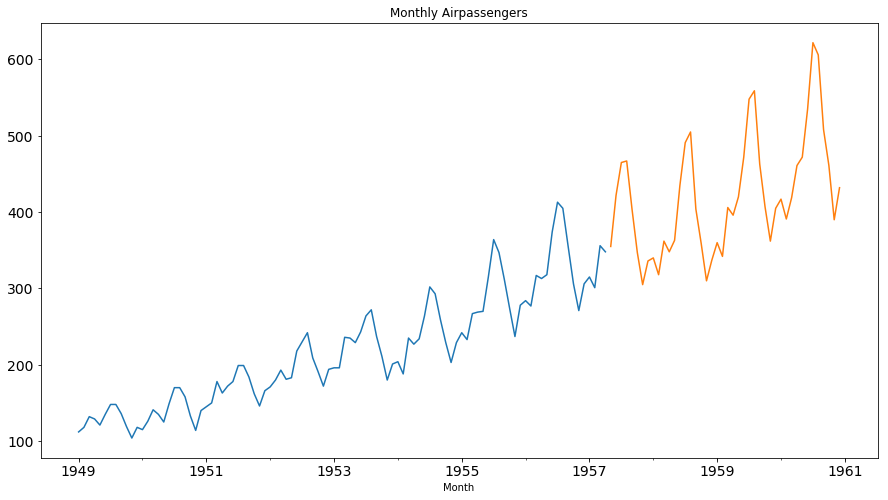

In [8]:
#Plot data
train.Passengers.plot(figsize=(15,8), title= 'Monthly Airpassengers', fontsize=14)
test.Passengers.plot(figsize=(15,8), title= 'Monthly Airpassengers', fontsize=14)

# Method1: Regression on Time

In [9]:
time = [i+1 for i in range(len(df))]

In [10]:
df1 = df.copy()
df1['time'] = time

In [11]:
monthDf = df1[['Month']]
df1.drop('Month', axis=1, inplace=True)
df1.head(2)

,Passengers,time
Month,,
1949-01-01,112,1
1949-02-01,118,2


In [12]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [13]:
x_train = train.drop('Passengers', axis=1)
x_test = test.drop('Passengers', axis=1)
y_train = train[['Passengers']]
y_test = test[['Passengers']]

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
model = LinearRegression()

In [16]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [17]:
predictions = model.predict(x_test)

In [18]:
y_test['RegOnTime'] = predictions

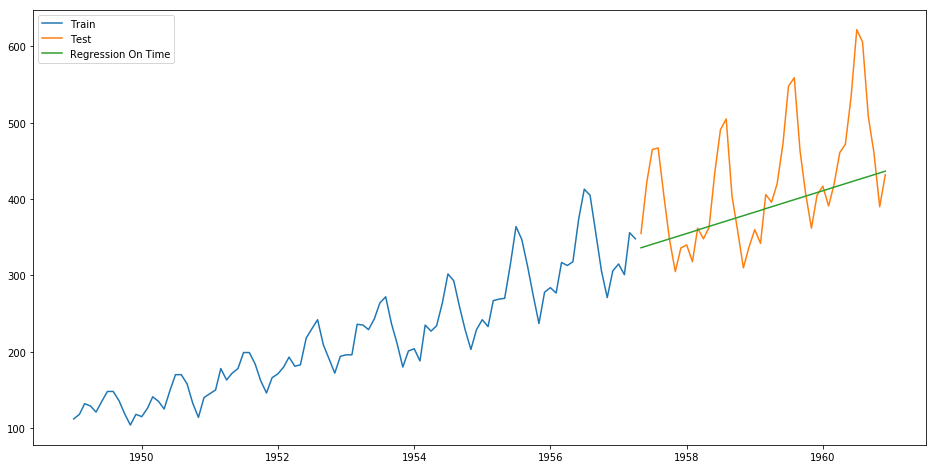

In [19]:
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [20]:
rmse = sqrt(mean_squared_error(test.Passengers, y_test.RegOnTime))
rmse = round(rmse, 3)
rmse

75.678

In [21]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'rmse': [rmse]})
resultsDf

,Method,rmse
0,RegressionOnTime,75.678


# Method2: Regression on Time With Seasonal Components

In [22]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time

In [23]:
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

In [24]:
df1['monthSeasonality'] = monthSeasonality*12
df1.head(2)

,Month,Passengers,time,monthSeasonality
Month,,,,
1949-01-01,1949-01,112,1,m1
1949-02-01,1949-02,118,2,m2


In [25]:
monthDf = df1[['Month']]
df1.drop('Month', axis=1, inplace=True)

In [26]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head(2).T

Month,1949-01-01 00:00:00,1949-02-01 00:00:00
Passengers,112,118
time,1,2
monthSeasonality_m10,0,0
monthSeasonality_m11,0,0
monthSeasonality_m12,0,0
monthSeasonality_m2,0,1
monthSeasonality_m3,0,0
monthSeasonality_m4,0,0
monthSeasonality_m5,0,0
monthSeasonality_m6,0,0


In [27]:
#Creating train and test set 
train=df1Complete[0:int(len(df1Complete)*0.7)] 
test=df1Complete[int(len(df1Complete)*0.7):]

In [28]:
x_train = train.drop('Passengers', axis=1)
x_test = test.drop('Passengers', axis=1)
y_train = train[['Passengers']]
y_test = test[['Passengers']]

In [29]:
model = LinearRegression()

In [30]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
predictions = model.predict(x_test)

In [32]:
y_test['RegOnTimeSeasonal'] = predictions

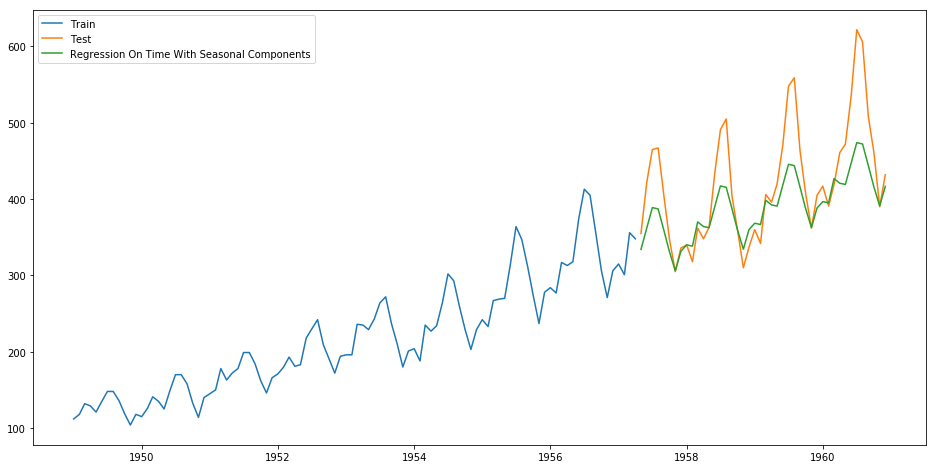

In [33]:
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [34]:
rmse = sqrt(mean_squared_error(test.Passengers, y_test.RegOnTimeSeasonal))
rmse = round(rmse, 3)
rmse

53.493

In [35]:
tempResultsDf = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493


# Method 3: Naive Approach:  \hat{y}_t+1 = y_t

In [36]:
dd= np.asarray(train.Passengers)

In [37]:
dd

array([112, 118, 132, 129, 121, 135, 148, 148, 136, 119, 104, 118, 115,
       126, 141, 135, 125, 149, 170, 170, 158, 133, 114, 140, 145, 150,
       178, 163, 172, 178, 199, 199, 184, 162, 146, 166, 171, 180, 193,
       181, 183, 218, 230, 242, 209, 191, 172, 194, 196, 196, 236, 235,
       229, 243, 264, 272, 237, 211, 180, 201, 204, 188, 235, 227, 234,
       264, 302, 293, 259, 229, 203, 229, 242, 233, 267, 269, 270, 315,
       364, 347, 312, 274, 237, 278, 284, 277, 317, 313, 318, 374, 413,
       405, 355, 306, 271, 306, 315, 301, 356, 348], dtype=int64)

In [38]:
y_hat = test.copy()

In [39]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

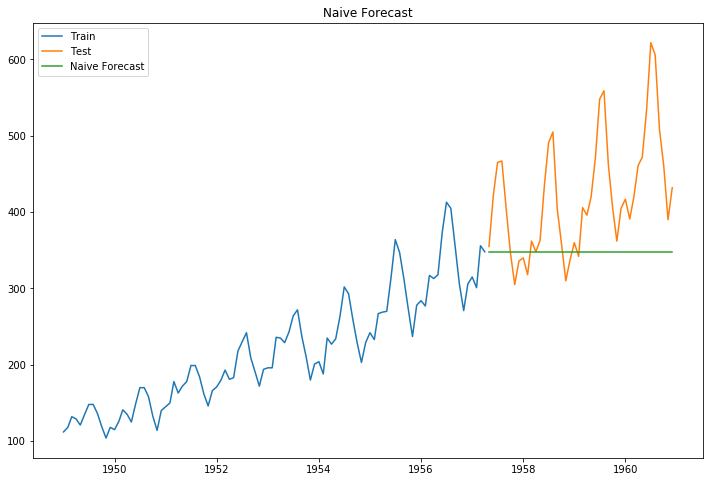

In [40]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Passengers'], label='Train')
plt.plot(test.index,test['Passengers'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [41]:
#RMSE Calculation
rmse = sqrt(mean_squared_error(test.Passengers, y_hat.naive))
rmse = round(rmse, 3)
rmse

105.75

In [42]:
tempResultsDf = pd.DataFrame({'Method':['Naive Method'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750


We can infer from the RMSE value and the graph above, that Naive method isn’t suited for datasets with high variability. It is best suited for stable datasets. We can still improve our score by adopting different techniques. Now we will look at another technique and try to improve our score.

# Method 4: Simple Average

In [43]:
y_hat_avg = test.copy()

In [44]:
y_hat_avg['avg_forecast'] = train['Passengers'].mean()

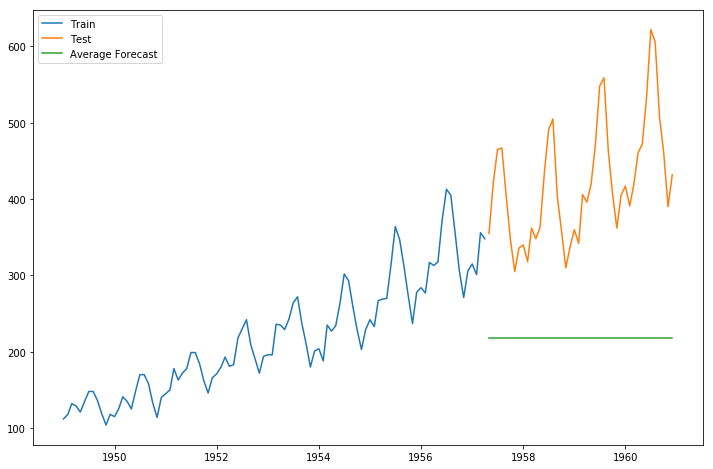

In [45]:
plt.figure(figsize=(12,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [46]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.avg_forecast))
rmse = round(rmse, 3)
rmse

216.644

In [47]:
tempResultsDf = pd.DataFrame({'Method':['Simple Average'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750
0,Simple Average,216.644


We can see that this model didn’t improve our score. Hence we can infer from the score that this method works best when the average at each time period remains constant. Though the score of Naive method is better than Average method, but this does not mean that the Naive method is better than Average method on all datasets. We should move step by step to each model and confirm whether it improves our model or not.

# Method5: Moving Average(MA)

In [48]:
df1 = df.copy()

In [49]:
df1['moving_avg_forecast'] = df['Passengers'].rolling(60).mean()

In [53]:
df1

,Month,Passengers,moving_avg_forecast
Month,,,
1949-01-01,1949-01,112,NaN
1949-02-01,1949-02,118,NaN
1949-03-01,1949-03,132,NaN
1949-04-01,1949-04,129,NaN
1949-05-01,1949-05,121,NaN
1949-06-01,1949-06,135,NaN
1949-07-01,1949-07,148,NaN
1949-08-01,1949-08,148,NaN
1949-09-01,1949-09,136,NaN


In [50]:
df1.head(2)

,Month,Passengers,moving_avg_forecast
Month,,,
1949-01-01,1949-01,112,NaN
1949-02-01,1949-02,118,NaN


In [51]:
df1.tail(2)

,Month,Passengers,moving_avg_forecast
Month,,,
1960-11-01,1960-11,390,393.866667
1960-12-01,1960-12,432,396.433333


In [52]:
df1

,Month,Passengers,moving_avg_forecast
Month,,,
1949-01-01,1949-01,112,NaN
1949-02-01,1949-02,118,NaN
1949-03-01,1949-03,132,NaN
1949-04-01,1949-04,129,NaN
1949-05-01,1949-05,121,NaN
1949-06-01,1949-06,135,NaN
1949-07-01,1949-07,148,NaN
1949-08-01,1949-08,148,NaN
1949-09-01,1949-09,136,NaN


In [538]:
#Creating train and test set 
train=df1[0:int(len(df1)*0.7)] 
test=df1[int(len(df1)*0.7):]

In [539]:
y_hat_avg = test.copy()

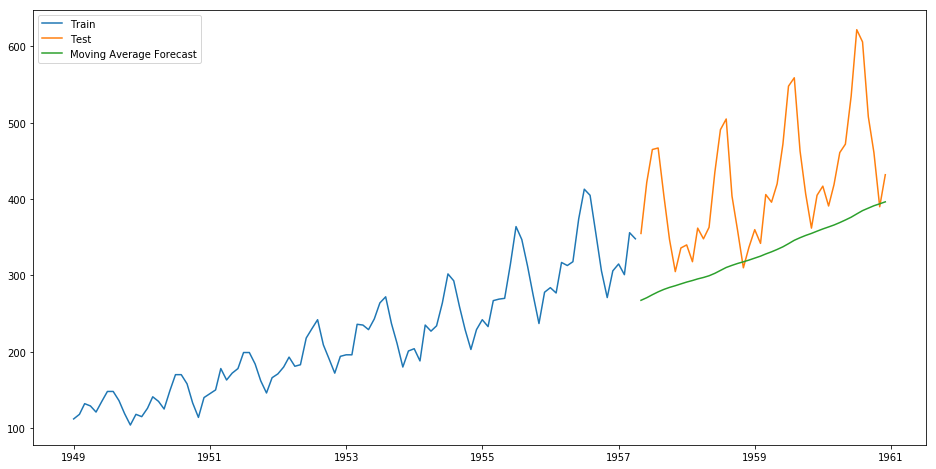

In [540]:
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['moving_avg_forecast'], label='Moving Average Forecast')
plt.legend(loc='best')

In [541]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.moving_avg_forecast))
rmse = round(rmse, 3)
rmse

112.696

In [542]:
tempResultsDf = pd.DataFrame({'Method':['Moving Average'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750
0,Simple Average,216.644
0,Moving Average,112.696


# Method6: Simple Exponential Smoothing

In [544]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [545]:
# create class
model = SimpleExpSmoothing(train['Passengers'])

In [546]:
# fit model
model_fit = model.fit(smoothing_level=0.6,optimized=False)

In [547]:
y_hat_avg = test.copy()

In [548]:
y_hat_avg['SES'] = model_fit.forecast(len(test['Passengers']))

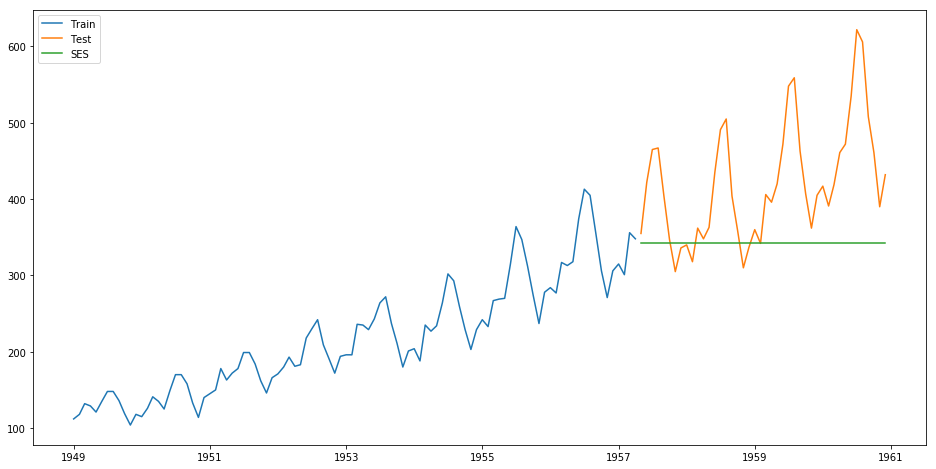

In [549]:
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['SES'], label='SES')
plt.legend(loc='best')

In [550]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.SES))
rmse = round(rmse, 3)

In [551]:
tempResultsDf = pd.DataFrame({'Method':['SES'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750
0,Simple Average,216.644
0,Moving Average,112.696
0,SES,109.294


# Method7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [552]:
import statsmodels.api as sm

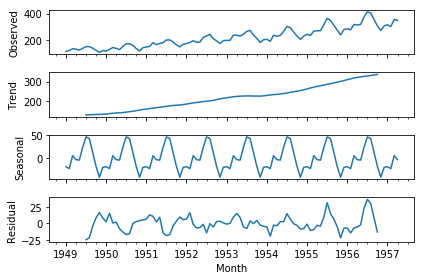

In [553]:
sm.tsa.seasonal_decompose(train.Passengers).plot()
plt.show()

### Predictions

In [554]:
y_hat_avg = test.copy()

In [555]:
fit1 = Holt(np.asarray(train['Passengers'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)

In [556]:
y_hat_avg['Holt_linear'] = fit1.forecast(len(test))

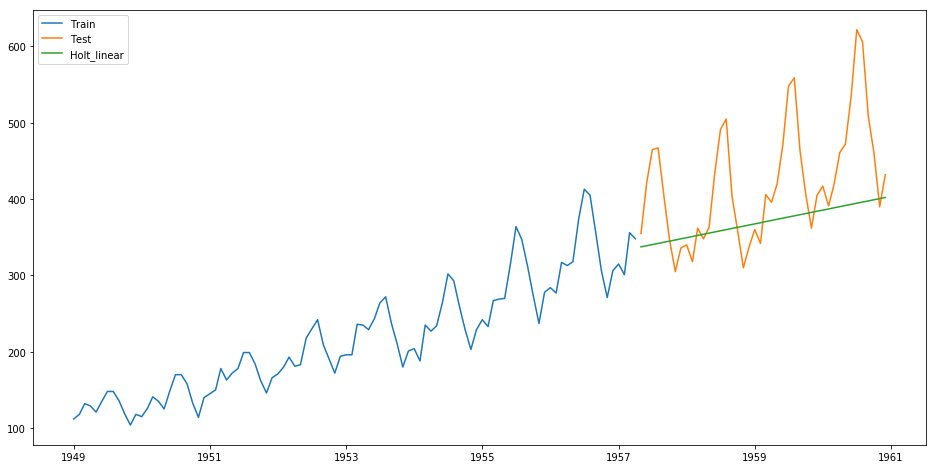

In [557]:
plt.figure(figsize=(16,8))
plt.plot(train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [558]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.Holt_linear))
rmse = round(rmse, 3)
rmse

86.156

In [559]:
tempResultsDf = pd.DataFrame({'Method':['Holt_linear'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750
0,Simple Average,216.644
0,Moving Average,112.696
0,SES,109.294
0,Holt_linear,86.156


# Method8: Holt-Winters Method

In [561]:
y_hat_avg = test.copy()

In [562]:
fit1 = ExponentialSmoothing(np.asarray(train['Passengers']) ,seasonal_periods=7 ,trend='add', seasonal='add').fit()

In [563]:
y_hat_avg['Holt_Winter'] = fit1.forecast(len(test))

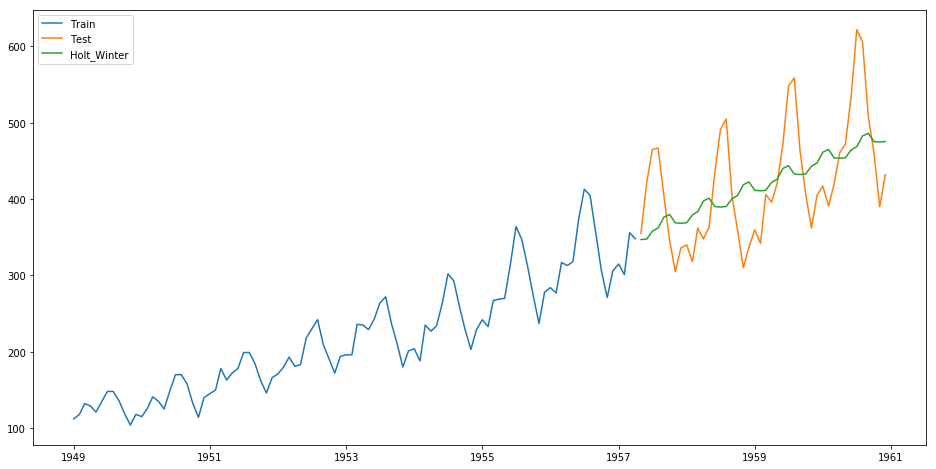

In [564]:
plt.figure(figsize=(16,8))
plt.plot( train['Passengers'], label='Train')
plt.plot(test['Passengers'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.legend(loc='best')

In [565]:
rmse = sqrt(mean_squared_error(test.Passengers, y_hat_avg.Holt_Winter))
rmse = round(rmse, 3)
rmse

67.273

In [566]:
tempResultsDf = pd.DataFrame({'Method':['Holt_Winters'], 'rmse': [rmse]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
0,RegressionOnTimeSeasonal,53.493
0,Naive Method,105.750
0,Simple Average,216.644
0,Moving Average,112.696
0,SES,109.294
0,Holt_linear,86.156
0,Holt_Winters,67.273


In [568]:
resultsDf.index = [i for i in range(len(resultsDf))]
resultsDf

,Method,rmse
0,RegressionOnTime,75.678
1,RegressionOnTimeSeasonal,53.493
2,Naive Method,105.750
3,Simple Average,216.644
4,Moving Average,112.696
5,SES,109.294
6,Holt_linear,86.156
7,Holt_Winters,67.273
